In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [14]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv") 

In [4]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
loan_df.head(10) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
loan_df.shape

(5000, 14)

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [8]:
# check the missing values

loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


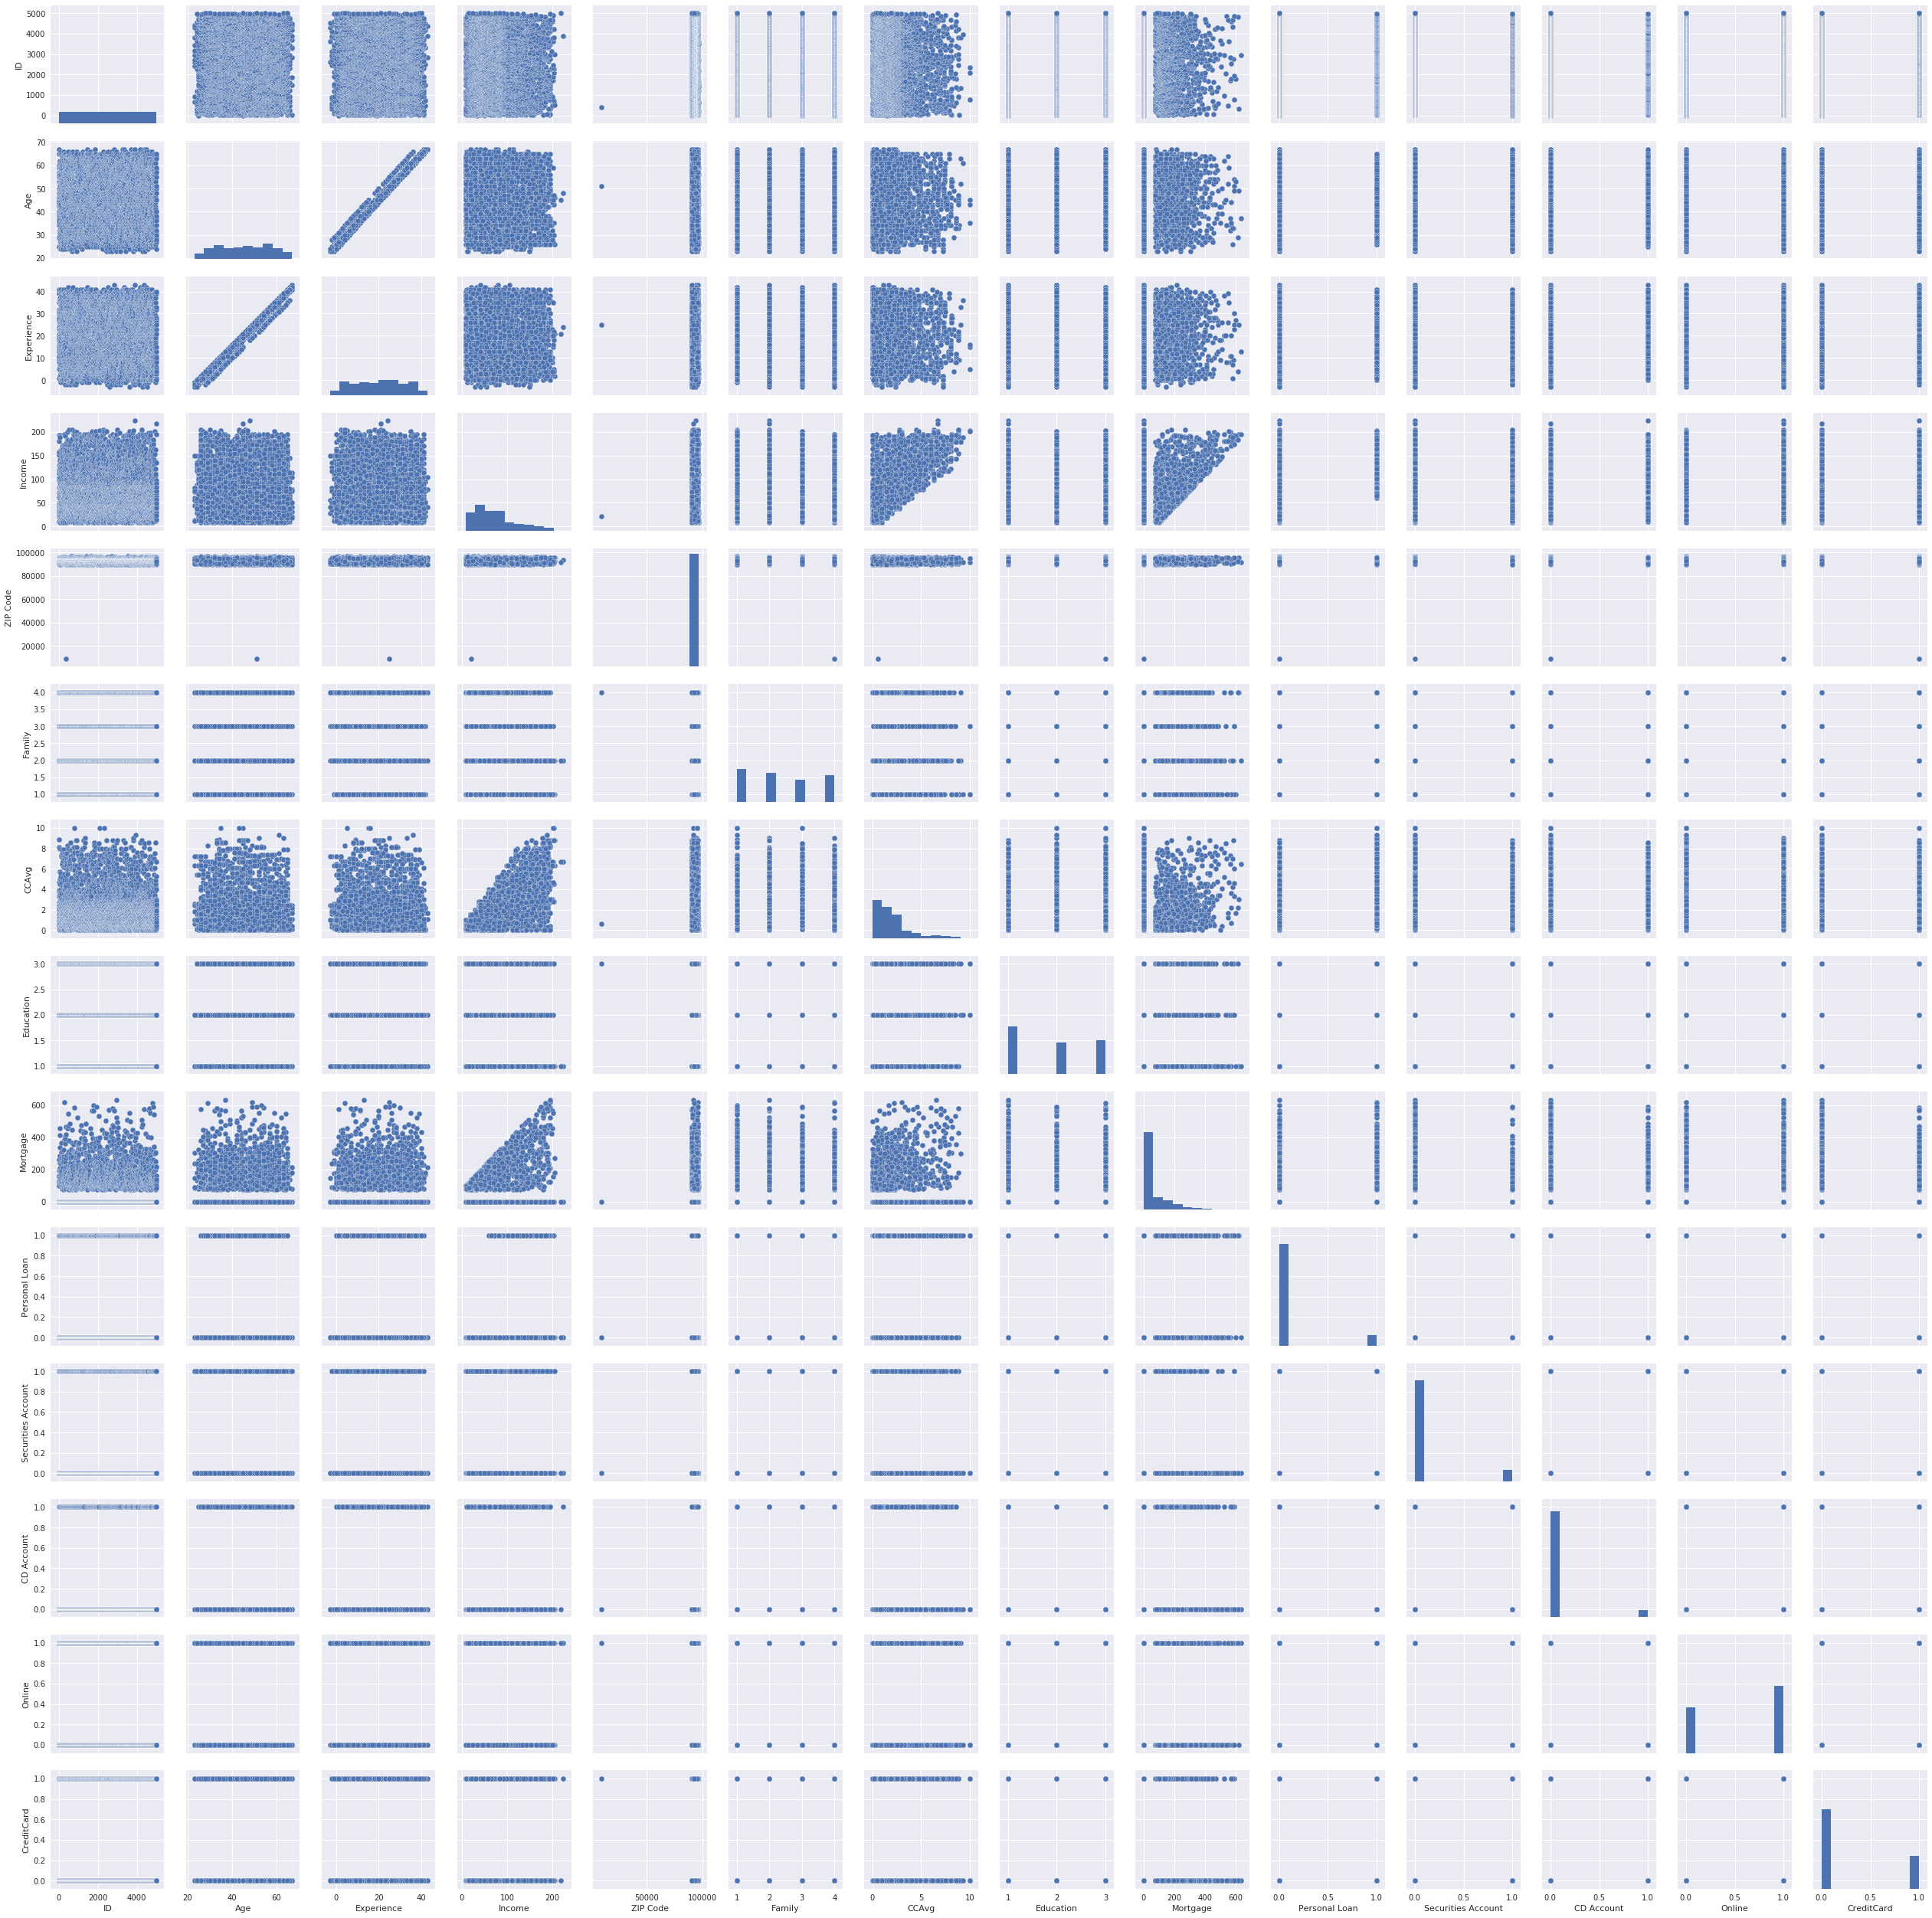

In [9]:
sns.pairplot(loan_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe04e667910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe04c59d410>]], dtype=object)

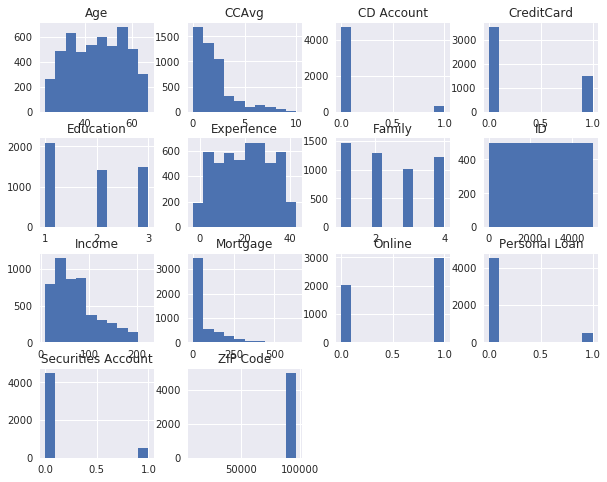

In [10]:
loan_df.hist(figsize=(10,8))

ID                       Axes(0.125,0.536818;0.0945122x0.343182)
Age                   Axes(0.238415,0.536818;0.0945122x0.343182)
Experience            Axes(0.351829,0.536818;0.0945122x0.343182)
Income                Axes(0.465244,0.536818;0.0945122x0.343182)
ZIP Code              Axes(0.578659,0.536818;0.0945122x0.343182)
Family                Axes(0.692073,0.536818;0.0945122x0.343182)
CCAvg                 Axes(0.805488,0.536818;0.0945122x0.343182)
Education                   Axes(0.125,0.125;0.0945122x0.343182)
Mortgage                 Axes(0.238415,0.125;0.0945122x0.343182)
Personal Loan            Axes(0.351829,0.125;0.0945122x0.343182)
Securities Account       Axes(0.465244,0.125;0.0945122x0.343182)
CD Account               Axes(0.578659,0.125;0.0945122x0.343182)
Online                   Axes(0.692073,0.125;0.0945122x0.343182)
CreditCard               Axes(0.805488,0.125;0.0945122x0.343182)
dtype: object

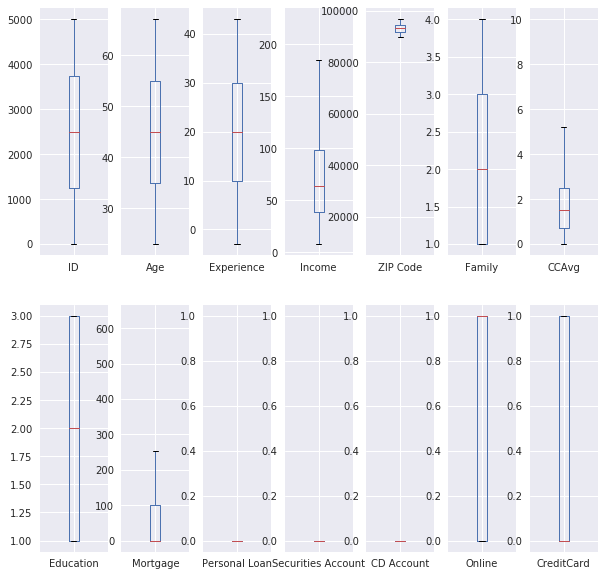

In [11]:
loan_df.plot(kind= 'box' , subplots=True, layout=(2,7), sharex=False, sharey=False, figsize=(10,10))

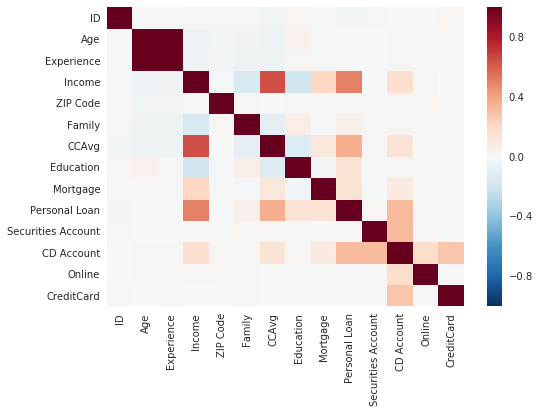

In [12]:
# Check the independence between independent variables

corr = loan_df[loan_df.columns].corr()
sns.heatmap(corr, annot = False)

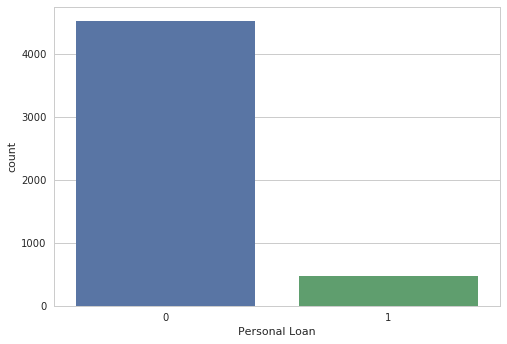

In [21]:
# Barplot for Personal Loan

sns.countplot(x="Personal Loan", data=loan_df)
plt.show()

In [ ]:
# Observations

# There are no null values
# Most of the people did not take personal loan
# People with more Income use their credit cards more often and have more value of house mortgage.
# Education has not much effect on the credit card usage or personal loan taken
# Number of family member has also not much effect on the credit card usage or personal loan taken
#
#
#